# STEP 04. 모맨텀 지표

In [60]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql.cursors
import re

In [61]:
# 그래프 스타일 설정
plt.style.use("seaborn")

C:\Users\yyseo\AppData\Local\Temp\ipykernel_20368\4282763211.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



### 1. 개별 종목 일별 시세 가져오기

In [62]:
# 데이터베이스 연결
connection = pymysql.connect(host='localhost',   #데이터베이스 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [63]:
cursor = connection.cursor()

In [117]:
#실행할 SQL
# 2019년 01월 01일 ~ 2020년 03월 19일 SK하이닉스의 종가, 시가, 고가, 저가, 거래량 조회
sql = """
      select t1.STK_CD as 코드, t1.STK_NM as 종목, t1.sec_nm,
             t2.DT as 날짜, t2.C_PRC as 종가, t2.O_PRC as 시가, t2.H_PRC as 고가, t2.L_PRC as 저가, t2.VOL as 거래량
      from stock as t1
           inner join history_dt as t2
                 on (t2.STK_CD = t1.STK_CD)
      where t1.STK_CD = '084690'
            and t2.DT >= str_to_date('20200319', '%Y%m%d')
            and t2.DT <= str_to_date('20201231', '%Y%m%d')
"""  

In [118]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

195

In [119]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [120]:
# SQL 쿼리 실행 결과 출력
result

[{'코드': '084690',
  '종목': '대상홀딩스',
  'sec_nm': '음식료',
  '날짜': datetime.date(2020, 3, 19),
  '종가': Decimal('3380.000'),
  '시가': Decimal('3900.000'),
  '고가': Decimal('4095.000'),
  '저가': Decimal('3345.000'),
  '거래량': Decimal('184846.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  'sec_nm': '음식료',
  '날짜': datetime.date(2020, 3, 20),
  '종가': Decimal('3490.000'),
  '시가': Decimal('3340.000'),
  '고가': Decimal('3525.000'),
  '저가': Decimal('3340.000'),
  '거래량': Decimal('107501.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  'sec_nm': '음식료',
  '날짜': datetime.date(2020, 3, 23),
  '종가': Decimal('3295.000'),
  '시가': Decimal('3250.000'),
  '고가': Decimal('3340.000'),
  '저가': Decimal('3230.000'),
  '거래량': Decimal('101304.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  'sec_nm': '음식료',
  '날짜': datetime.date(2020, 3, 24),
  '종가': Decimal('3575.000'),
  '시가': Decimal('3345.000'),
  '고가': Decimal('3640.000'),
  '저가': Decimal('3345.000'),
  '거래량': Decimal('126897.000')},
 {'코드': '084690',
  '종목': '대상홀딩스',
  'sec_nm

In [68]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [69]:
df

,코드,종목,날짜,종가,시가,고가,저가,거래량
0,084690,대상홀딩스,2020-03-19,3380.000,3900.000,4095.000,3345.000,184846.000
1,084690,대상홀딩스,2020-03-20,3490.000,3340.000,3525.000,3340.000,107501.000
2,084690,대상홀딩스,2020-03-23,3295.000,3250.000,3340.000,3230.000,101304.000
3,084690,대상홀딩스,2020-03-24,3575.000,3345.000,3640.000,3345.000,126897.000
4,084690,대상홀딩스,2020-03-25,3855.000,3700.000,3970.000,3685.000,113974.000
...,...,...,...,...,...,...,...,...
190,084690,대상홀딩스,2020-12-23,10250.000,10250.000,10400.000,10150.000,173642.000
191,084690,대상홀딩스,2020-12-24,10250.000,10300.000,10400.000,10150.000,189253.000
192,084690,대상홀딩스,2020-12-28,10300.000,10300.000,10500.000,10200.000,292506.000
193,084690,대상홀딩스,2020-12-29,10150.000,10250.000,10400.000,10100.000,210539.000


In [70]:
#조회한 컬럼 정보 조회

cursor.description

(('코드', 253, None, 40, 40, 0, False),
 ('종목', 253, None, 200, 200, 0, True),
 ('날짜', 10, None, 10, 10, 0, False),
 ('종가', 246, None, 20, 20, 3, True),
 ('시가', 246, None, 20, 20, 3, True),
 ('고가', 246, None, 20, 20, 3, True),
 ('저가', 246, None, 20, 20, 3, True),
 ('거래량', 246, None, 20, 20, 3, True))

In [71]:
#조회한 컬럼의 정보를 desc에 저장

desc = cursor.description

In [72]:
desc

(('코드', 253, None, 40, 40, 0, False),
 ('종목', 253, None, 200, 200, 0, True),
 ('날짜', 10, None, 10, 10, 0, False),
 ('종가', 246, None, 20, 20, 3, True),
 ('시가', 246, None, 20, 20, 3, True),
 ('고가', 246, None, 20, 20, 3, True),
 ('저가', 246, None, 20, 20, 3, True),
 ('거래량', 246, None, 20, 20, 3, True))

In [73]:
#리스트의 행 열 방향 바꾸기

list( zip(*desc) )

[('코드', '종목', '날짜', '종가', '시가', '고가', '저가', '거래량'),
 (253, 253, 10, 246, 246, 246, 246, 246),
 (None, None, None, None, None, None, None, None),
 (40, 200, 10, 20, 20, 20, 20, 20),
 (40, 200, 10, 20, 20, 20, 20, 20),
 (0, 0, 0, 3, 3, 3, 3, 3),
 (False, True, False, True, True, True, True, True)]

In [74]:
#리스트의 0번째 열 리턴 => 조회한 컬럼 이름
list( zip(*desc) )[0]

('코드', '종목', '날짜', '종가', '시가', '고가', '저가', '거래량')

In [75]:
#조회한 컬럼 이름을 column_name 에 대입

column_name = list( zip(*desc) )[0]

In [76]:
column_name

('코드', '종목', '날짜', '종가', '시가', '고가', '저가', '거래량')

In [77]:
# for element in column_name : column_name에서 컬럼 이름 1개를 element에 대입
#element.upper() : 컬럼 이름 1개가 저장된 element를 대문자로 변환해서 리턴

[element.upper() for element in column_name]

['코드', '종목', '날짜', '종가', '시가', '고가', '저가', '거래량']

In [78]:
# for element in column_name : column_name에서 컬럼 이름 1개를 element에 대입
#element.upper() : 컬럼 이름 1개가 저장된 element를 대문자로 변환해서 리턴
#대문자로 변환한 컬럼 이름을 column_name에 대입

column_name = [element.upper() for element in column_name]

In [79]:
column_name

['코드', '종목', '날짜', '종가', '시가', '고가', '저가', '거래량']

In [80]:
#re.sub() : 특정 문자를 찾아서 삭제
#\S : 문자열
#\. : .
# .앞의 문자열 찾아서 삭제

# T3.FIN_ITM_VAL -> FIN_ITM_VAL 으로 변환

re.sub('\S*\.',"","T3.FIN_ITM_VAL" ) 

'FIN_ITM_VAL'

In [81]:
#re.sub() : 특정 문자를 찾아서 삭제
#\S : 문자열
#\. : .
# .앞의 문자열 찾아서 삭제

# 컬럼 이름에 . 앞의 문자열 삭제

column_name = [re.sub('\S*\.',"",element)  for element in column_name]

In [82]:
column_name

['코드', '종목', '날짜', '종가', '시가', '고가', '저가', '거래량']

In [83]:
#컬럼명 대입

df.columns = column_name

In [84]:
df

,코드,종목,날짜,종가,시가,고가,저가,거래량
0,084690,대상홀딩스,2020-03-19,3380.000,3900.000,4095.000,3345.000,184846.000
1,084690,대상홀딩스,2020-03-20,3490.000,3340.000,3525.000,3340.000,107501.000
2,084690,대상홀딩스,2020-03-23,3295.000,3250.000,3340.000,3230.000,101304.000
3,084690,대상홀딩스,2020-03-24,3575.000,3345.000,3640.000,3345.000,126897.000
4,084690,대상홀딩스,2020-03-25,3855.000,3700.000,3970.000,3685.000,113974.000
...,...,...,...,...,...,...,...,...
190,084690,대상홀딩스,2020-12-23,10250.000,10250.000,10400.000,10150.000,173642.000
191,084690,대상홀딩스,2020-12-24,10250.000,10300.000,10400.000,10150.000,189253.000
192,084690,대상홀딩스,2020-12-28,10300.000,10300.000,10500.000,10200.000,292506.000
193,084690,대상홀딩스,2020-12-29,10150.000,10250.000,10400.000,10100.000,210539.000


In [85]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   코드      195 non-null    object
 1   종목      195 non-null    object
 2   날짜      195 non-null    object
 3   종가      195 non-null    object
 4   시가      195 non-null    object
 5   고가      195 non-null    object
 6   저가      195 non-null    object
 7   거래량     195 non-null    object
dtypes: object(8)
memory usage: 12.3+ KB


In [86]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["날짜"] = pd.to_datetime (df["날짜"])

In [87]:
# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "종가" : ] = df.loc[: , "종가" : ].astype(int)

In [88]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   코드      195 non-null    object        
 1   종목      195 non-null    object        
 2   날짜      195 non-null    datetime64[ns]
 3   종가      195 non-null    object        
 4   시가      195 non-null    object        
 5   고가      195 non-null    object        
 6   저가      195 non-null    object        
 7   거래량     195 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 12.3+ KB


### 2. 전일 대비 상승, 하락 변수 생성하기

In [89]:
# diff() : 함수는 윗줄 (하루전) 데이터와 아래줄 데이터(현재)의 차를 계산

df["diff"] = df["종가"].diff()

In [90]:
def UD(diff):
    """
    diff 값을 입력받아 0이면 ups, downs을 0으로 
    0보다 크면 ups 에 diff값을 작으면 downs 에 abs(diff) 값을 반환합니다.
    ups = 전날 주가보다 오늘 주가가 상승할 때의 주가 상승폭(up)
    downs = 전날 주가보다 오늘 주가가 하락할 때의 주가 하락폭(down)
    """
    ups = 0
    downs = 0
    # 전날주가 - 오늘주가가 0 초과
    if diff > 0:
        # 상승치를 ups에 대입
        ups = diff
    elif diff < 0: # 전날주가 - 오늘주가가 0 미만
        # 하락치의 절대값 (abs)를 downs 에 대입
        downs = abs(diff)
    # ups와 downs 를 Series(DataFrame 칸) 으로 만들어서 리턴    
    return pd.Series([ups, downs])

In [91]:
#  df["diff"] 컬럼 데이터에 UD 함수를 실행해서 상승분과 하락분을 계산하고
# 상승분은 U, 하락분은 D 컬럼에 저장
df[["U", "D"]] = df["diff"].apply(UD)

In [92]:
df

,코드,종목,날짜,종가,시가,고가,저가,거래량,diff,U,D
0,084690,대상홀딩스,2020-03-19,3380,3900,4095,3345,184846,NaN,0,0
1,084690,대상홀딩스,2020-03-20,3490,3340,3525,3340,107501,110,110,0
2,084690,대상홀딩스,2020-03-23,3295,3250,3340,3230,101304,-195,0,195
3,084690,대상홀딩스,2020-03-24,3575,3345,3640,3345,126897,280,280,0
4,084690,대상홀딩스,2020-03-25,3855,3700,3970,3685,113974,280,280,0
...,...,...,...,...,...,...,...,...,...,...,...
190,084690,대상홀딩스,2020-12-23,10250,10250,10400,10150,173642,50,50,0
191,084690,대상홀딩스,2020-12-24,10250,10300,10400,10150,189253,0,0,0
192,084690,대상홀딩스,2020-12-28,10300,10300,10500,10200,292506,50,50,0
193,084690,대상홀딩스,2020-12-29,10150,10250,10400,10100,210539,-150,0,150


### 3. AU / AD 변수 생성하기
* AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
* AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)

In [93]:
# AU = 일정기간(N일,보통14일) 동안의 U의 평균값(average ups)
df["AU"] = df["U"].rolling(14).mean()

In [94]:
# AD = 일정기간(N일,보통14일) 동안의 D의 평균값(average downs)
df["AD"] = df["D"].rolling(14).mean()

In [95]:
df

,코드,종목,날짜,종가,시가,고가,저가,거래량,diff,U,D,AU,AD
0,084690,대상홀딩스,2020-03-19,3380,3900,4095,3345,184846,NaN,0,0,NaN,NaN
1,084690,대상홀딩스,2020-03-20,3490,3340,3525,3340,107501,110,110,0,NaN,NaN
2,084690,대상홀딩스,2020-03-23,3295,3250,3340,3230,101304,-195,0,195,NaN,NaN
3,084690,대상홀딩스,2020-03-24,3575,3345,3640,3345,126897,280,280,0,NaN,NaN
4,084690,대상홀딩스,2020-03-25,3855,3700,3970,3685,113974,280,280,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,084690,대상홀딩스,2020-12-23,10250,10250,10400,10150,173642,50,50,0,45.714286,17.857143
191,084690,대상홀딩스,2020-12-24,10250,10300,10400,10150,189253,0,0,0,45.714286,13.571429
192,084690,대상홀딩스,2020-12-28,10300,10300,10500,10200,292506,50,50,0,45.000000,13.571429
193,084690,대상홀딩스,2020-12-29,10150,10250,10400,10100,210539,-150,0,150,44.285714,24.285714


### 4. RS, RSI 만들기
* RS = AU / AD
* RSI = AU / (AU+AD) = RS / (1+RS)

In [96]:
# RS = AU(일정기간(N일,보통14일) 동안의 U의 평균값(average ups) ) / AD (일정기간(N일,보통14일) 동안의 D의 평균값(average downs))
df["RS"] = df["AU"] / df["AD"]

In [97]:
#AU / (AU+AD) = RS / (1+RS)
df["RSI"] = df["RS"] / (1 + df["RS"])

In [98]:
df.tail()

,코드,종목,날짜,종가,시가,고가,저가,거래량,diff,U,D,AU,AD,RS,RSI
190,084690,대상홀딩스,2020-12-23,10250,10250,10400,10150,173642,50,50,0,45.714286,17.857143,2.560000,0.719101
191,084690,대상홀딩스,2020-12-24,10250,10300,10400,10150,189253,0,0,0,45.714286,13.571429,3.368421,0.771084
192,084690,대상홀딩스,2020-12-28,10300,10300,10500,10200,292506,50,50,0,45.000000,13.571429,3.315789,0.768293
193,084690,대상홀딩스,2020-12-29,10150,10250,10400,10100,210539,-150,0,150,44.285714,24.285714,1.823529,0.645833
194,084690,대상홀딩스,2020-12-30,10200,10150,10250,10050,169105,50,50,0,47.857143,23.571429,2.030303,0.670000


### 5. RSI signal 만들기
* RSI 시그널 = RSI의 이동평균선 (6일의 이동평균선 사용)

In [99]:
# RSI_signal 변수를 생성합니다.
df['RSI_signal'] = df["RSI"].rolling(6).mean()

In [100]:
df.tail()

,코드,종목,날짜,종가,시가,고가,저가,거래량,diff,U,D,AU,AD,RS,RSI,RSI_signal
190,084690,대상홀딩스,2020-12-23,10250,10250,10400,10150,173642,50,50,0,45.714286,17.857143,2.560000,0.719101,0.647716
191,084690,대상홀딩스,2020-12-24,10250,10300,10400,10150,189253,0,0,0,45.714286,13.571429,3.368421,0.771084,0.672064
192,084690,대상홀딩스,2020-12-28,10300,10300,10500,10200,292506,50,50,0,45.000000,13.571429,3.315789,0.768293,0.698663
193,084690,대상홀딩스,2020-12-29,10150,10250,10400,10100,210539,-150,0,150,44.285714,24.285714,1.823529,0.645833,0.695191
194,084690,대상홀딩스,2020-12-30,10200,10150,10250,10050,169105,50,50,0,47.857143,23.571429,2.030303,0.670000,0.700329


In [101]:
# DT 컬럼 (날짜) 를 인덱스로 설정
df = df.set_index("날짜")

In [102]:
df.head()

,코드,종목,종가,시가,고가,저가,거래량,diff,U,D,AU,AD,RS,RSI,RSI_signal
날짜,,,,,,,,,,,,,,,
2020-03-19,084690,대상홀딩스,3380,3900,4095,3345,184846,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2020-03-20,084690,대상홀딩스,3490,3340,3525,3340,107501,110,110,0,NaN,NaN,NaN,NaN,NaN
2020-03-23,084690,대상홀딩스,3295,3250,3340,3230,101304,-195,0,195,NaN,NaN,NaN,NaN,NaN
2020-03-24,084690,대상홀딩스,3575,3345,3640,3345,126897,280,280,0,NaN,NaN,NaN,NaN,NaN
2020-03-25,084690,대상홀딩스,3855,3700,3970,3685,113974,280,280,0,NaN,NaN,NaN,NaN,NaN


### 6. RSI의 해석
1. RSI는 50%를 기준으로, 50% 이상은 매수세 우세, 50% 이하는 매도세 우세를 나타냅니다.
2. RSI가 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입했다고 판단합니다.
3. RSI가 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입했다고 판단합니다.
4. RSI가 시그널선을 상향돌파하면 단기적으로 매수세가 늘어나는 추세라고 판단합니다.
5. RSI가 시그널선을 하향돌파하면 단기적으로 매도세가 늘어나는 추세라고 판단합니다.

C:\Users\yyseo\anaconda3\envs\sql_project_env01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

C:\Users\yyseo\anaconda3\envs\sql_project_env01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.



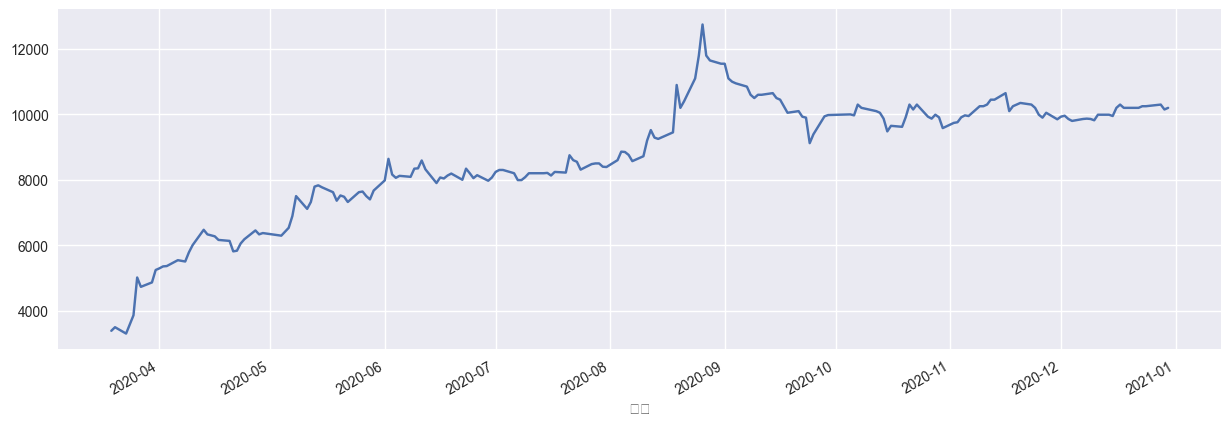

In [103]:
# RSI와 비교해 보기 위해 종가를 시각화 합니다.
df["종가"].plot(figsize = (15, 5))
plt.show()

C:\Users\yyseo\anaconda3\envs\sql_project_env01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.

C:\Users\yyseo\anaconda3\envs\sql_project_env01\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.



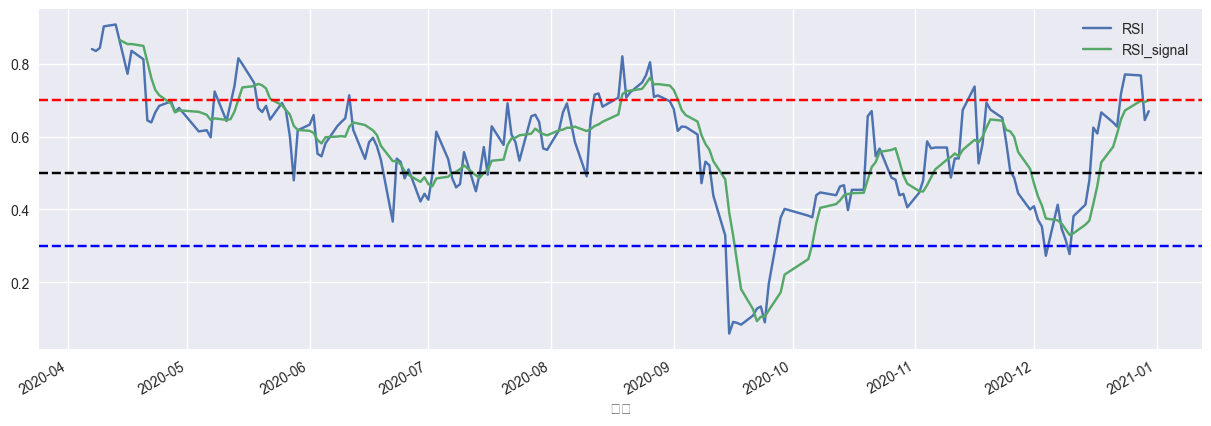

In [104]:
# 'RSI','RSI_signal' 을 시각화 합니다.
df[["RSI", "RSI_signal"]].plot(figsize=(15, 5))
# RSI 가 70퍼센트 지점에 빨강색 선 ->  RSI가 70% 이상이면 매수세가 상당히 커서 초과매수 국면에 돌입했다고 판단합니다.
plt.axhline(0.7, c="r", ls="--")
# RSI 가 50 퍼센트 지점에 검정색 선 -> RSI는 50%를 기준으로, 50% 이상은 매수세 우세, 50% 이하는 매도세 우세를 나타냅니다.
plt.axhline(0.5, c="k", ls="--")
# RSI 가 30 퍼센트 지점에 파랑색 선 ->  RSI가 30% 이하이면 매도세가 상당히 커서 초과매도 국면에 돌입했다고 판단합니다.
plt.axhline(0.3, c="b", ls="--")
plt.show()

### 7. plotly를 통한 시각화

- plotly.express로 간단하게 시각화한다.

In [105]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
# !pip install plotly --upgrade

In [106]:
# plotly.express 로드하기
import plotly.express as px

In [107]:
# 0.3, 0.7 값을 컬럼으로 만들어 줍니다.
df["s3"] = 0.3
df["s7"] = 0.7

In [108]:
df.tail()

,코드,종목,종가,시가,고가,저가,거래량,diff,U,D,AU,AD,RS,RSI,RSI_signal,s3,s7
날짜,,,,,,,,,,,,,,,,,
2020-12-23,084690,대상홀딩스,10250,10250,10400,10150,173642,50,50,0,45.714286,17.857143,2.560000,0.719101,0.647716,0.3,0.7
2020-12-24,084690,대상홀딩스,10250,10300,10400,10150,189253,0,0,0,45.714286,13.571429,3.368421,0.771084,0.672064,0.3,0.7
2020-12-28,084690,대상홀딩스,10300,10300,10500,10200,292506,50,50,0,45.000000,13.571429,3.315789,0.768293,0.698663,0.3,0.7
2020-12-29,084690,대상홀딩스,10150,10250,10400,10100,210539,-150,0,150,44.285714,24.285714,1.823529,0.645833,0.695191,0.3,0.7
2020-12-30,084690,대상홀딩스,10200,10150,10250,10050,169105,50,50,0,47.857143,23.571429,2.030303,0.670000,0.700329,0.3,0.7


In [109]:
# RSI, RSI_signal, s3, s7 을 선그래프로 그림
px.line(df[["RSI", "RSI_signal", "s3", "s7"]])

- graph_objs 와 subplots 을 사용한 시각화

In [110]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 3 줄 1칸짜리 그래프 생성 
fig = make_subplots(rows=3, 
                    cols=1,
                    vertical_spacing=0.01,
                    shared_xaxes=True,
                    # 각 줄의 제목
                    subplot_titles=('<b>대상홀딩스</b>',
                                    '<b>Select Date Range!</b>',
                                    '<b>RSI & RSI signal</b>'))


fig.add_trace(    # 봉차트 추가
                   go.Candlestick(
                        x=df.index,              #날짜
                        open=df['시가'],      # 시가
                        high=df['고가'],     #고가
                        low=df['저가'],       #저가
                        close=df['종가'],   # 종가
                        increasing_line_color='red', # 상승봉의 색 설정
                        decreasing_line_color='blue' # 하락봉의 색 설정
                  ), 
                  row=1, col=1) # 1번째줄 1번째 칸에 추가

fig.add_trace(
                    # 선그래프 추가
                     go.Scatter(
                         x=df.index, #날짜
                         y=df['RSI'], # RSI
                         line=dict(color='blue'), #파란색
                         name='RSI'), # 범례
                row=3, col=1) # 3번째줄 1번째 칸에 추가

fig.add_trace(    #선그래프 주차 
                  go.Scatter(x=df.index, #날짜 
                         y=df['RSI_signal'], #RSI_signal
                         line=dict(color='red'), #빨강색
                         name='RSI_signal'), #범례
                         row=3, col=1) #3번째 줄 1번째 칸에 추가
#선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s3"],#s3 
                         line=dict(color='red',dash='dash'), #빨강색
                         name='Low Bound'),#범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 선그래프 추가
fig.add_trace(go.Scatter(x=df.index, #날짜
                         y=df["s7"],#s3
                         line=dict(color='blue',dash='dash'),#파랑색
                         name='High Bound'), #범례
              row=3,col=1) #3번째줄 1번째 칸에 추가

# 그래프 가로 1200 세로 800 기간 슬라이더 추가
fig.update_layout(width=1200, height=800, xaxis_rangeslider_visible=True)

fig.show()